In [40]:
#importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#DATA COLLECTION

In [41]:
df= pd.read_csv("rent_apts.csv")
df.head(10)

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN
5,Lizmor Properties,"Waiyaki Way, Westlands","KSh 150,000",/listings/furnished-2-bedroom-apartment-for-re...,2.0,2.0,NaN
6,Mambo Properties Enterprise,"Off Denis Pritt, Kilimani, Dagoretti North","KSh 100,000",/listings/2-bedroom-apartment-for-rent-kiliman...,14.0,2.0,3.0
7,Wealthlink Realtors Ltd,"Westlands Area, Westlands","KSh 100,000",/listings/3-bedroom-apartment-for-rent-westlan...,186.0,3.0,3.0
8,Pmc Estates Limited,"Thika Road, Thika Road","KSh 85,000",/listings/4-bedroom-apartment-for-rent-thika-r...,4.0,4.0,NaN
9,Naftal Properties,"Kilimani, Dagoretti North","KSh 65,000",/listings/2-bedroom-apartment-for-rent-kiliman...,2.0,2.0,2.0


DATA CLEANING

In [42]:
df.shape


(1848, 7)

In [43]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   object 
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 101.2+ KB


In [44]:
df.isna().sum()  #Missing values

Agency            0
Neighborhood      0
Price             0
link              0
sq_mtrs           2
Bedrooms          3
Bathrooms       291
dtype: int64

There are missing values on the last three columns
These are float data types

In [45]:
#checking for number of unique values
df.nunique()

Agency           194
Neighborhood     647
Price            112
link            1761
sq_mtrs          154
Bedrooms           7
Bathrooms          6
dtype: int64

In [46]:
df.describe()

,sq_mtrs,Bedrooms,Bathrooms
count,1846.000000,1845.000000,1557.000000
mean,327.226977,2.577778,2.595376
std,2048.784581,0.819399,1.000349
min,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,2.000000
75%,4.000000,3.000000,3.000000
max,40470.000000,6.000000,6.000000


In [47]:
#the price column is an object type, we shall convert it to float
#first we shall remove the KSh sign and the comma (KSh 50,000)
df['Price'].str.replace('KSh','',regex=True).str.replace(',','')

0        155000
1        100000
2         75000
3        135000
4         50000
         ...   
1843     180000
1844     180000
1845     180000
1846     180000
1847     180000
Name: Price, Length: 1848, dtype: object

In [48]:
df['Price'] = df['Price'].str.replace('KSh','',regex=True).str.replace(',','').astype(float)

<AxesSubplot: >

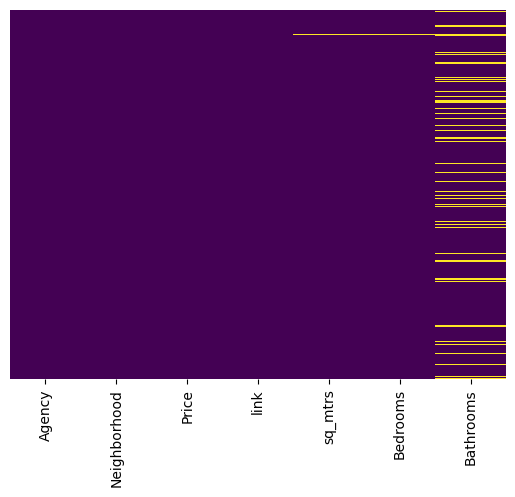

In [49]:
#Heatmap for missing values
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [50]:
#We can see that the bathroom column has quite a number of missing values
#Lets first remove rows(houses) that dont have sq_mtrs and bedrooms
df.dropna(subset=['sq_mtrs','Bedrooms'],inplace=True)

In [51]:
#check for houses that have missing bathrooms as null values
df[df['Bathrooms'].isnull()]

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000.0,/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN
5,Lizmor Properties,"Waiyaki Way, Westlands",150000.0,/listings/furnished-2-bedroom-apartment-for-re...,2.0,2.0,NaN
8,Pmc Estates Limited,"Thika Road, Thika Road",85000.0,/listings/4-bedroom-apartment-for-rent-thika-r...,4.0,4.0,NaN
19,Real Management Services 2002Limited,"Sports Road, Waiyaki Way, Westlands",13000.0,/listings/studio-apartment-for-rent-waiyaki-wa...,0.0,0.0,NaN
36,Cfs Homes,"Ruaka, Kiambaa",16000.0,/listings/1-bedroom-apartment-for-rent-ruaka-3...,1.0,1.0,NaN
...,...,...,...,...,...,...,...
1817,Capstone Properties,"General Mathenge, Westlands",175000.0,/listings/3-bedroom-apartment-for-rent-general...,3.0,3.0,NaN
1820,Cloud Real Estate,"General Mathenge, Westlands",175000.0,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,NaN
1833,Rainbow Properties Limited,"State House, Dagoretti North",180000.0,/listings/furnished-3-bedroom-apartment-for-re...,3.0,3.0,NaN
1843,Avic International,"Laikipia Road, Kileleshwa, Dagoretti North",180000.0,/listings/3-bedroom-apartment-for-rent-kileles...,3.0,3.0,NaN


In [52]:
#we see the bathroom column has a good correlation with the price column
#We shall group the houses by the number of bedrooms and fill the missing values
#with the mean of the bathrooms in each group, rounded to whole numbers
df.groupby('Bedrooms')['Bathrooms'].transform(lambda x: x.fillna(round(x.mean())))

0       4.0
1       4.0
2       5.0
3       4.0
4       3.0
       ... 
1843    3.0
1844    2.0
1845    5.0
1846    4.0
1847    2.0
Name: Bathrooms, Length: 1845, dtype: float64

In [53]:
df['Bathrooms'] = df.groupby('Bedrooms')['Bathrooms'].transform(lambda x: x.fillna(round(x.mean())))

In [54]:
df.isnull().sum()

Agency          0
Neighborhood    0
Price           0
link            0
sq_mtrs         0
Bedrooms        0
Bathrooms       0
dtype: int64

VISUALISATIONS


MODEL CREATIOM

In [55]:
# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
x,y = df[['Agency','Neighborhood','sq_mtrs','Bedrooms','Bathrooms']].values,df['Price']

In [56]:
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (x_train.shape[0], x_test.shape[0]))

Training Set: 1291 rows
Test Set: 554 rows


In [57]:
train_df = x_train.join(y_train)
train_df

AttributeError: 'numpy.ndarray' object has no attribute 'join'

array([[<AxesSubplot: title={'center': 'sq_mtrs'}>,
        <AxesSubplot: title={'center': 'Bedrooms'}>],
       [<AxesSubplot: title={'center': 'Bathrooms'}>,
        <AxesSubplot: title={'center': 'Price'}>]], dtype=object)

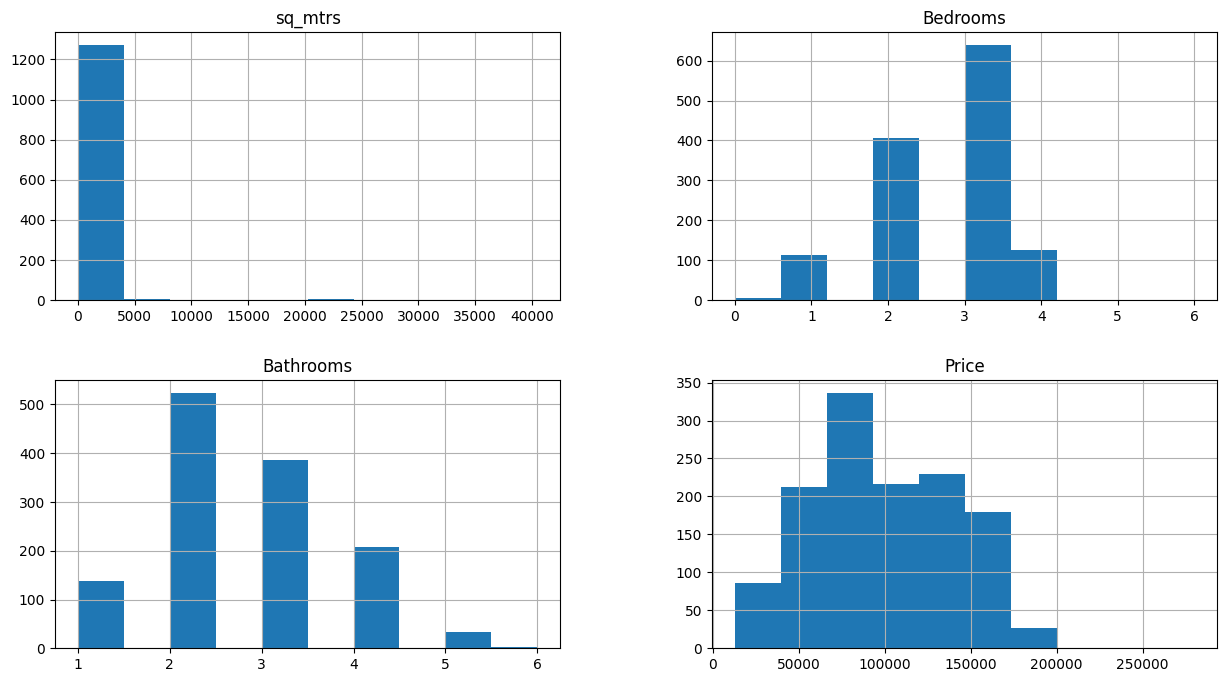

In [ ]:
train_df.hist(figsize=(15,8))

C:\Users\User\AppData\Local\Temp\ipykernel_2548\985473098.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),annot=True,cmap='YlGnBu')


<AxesSubplot: >

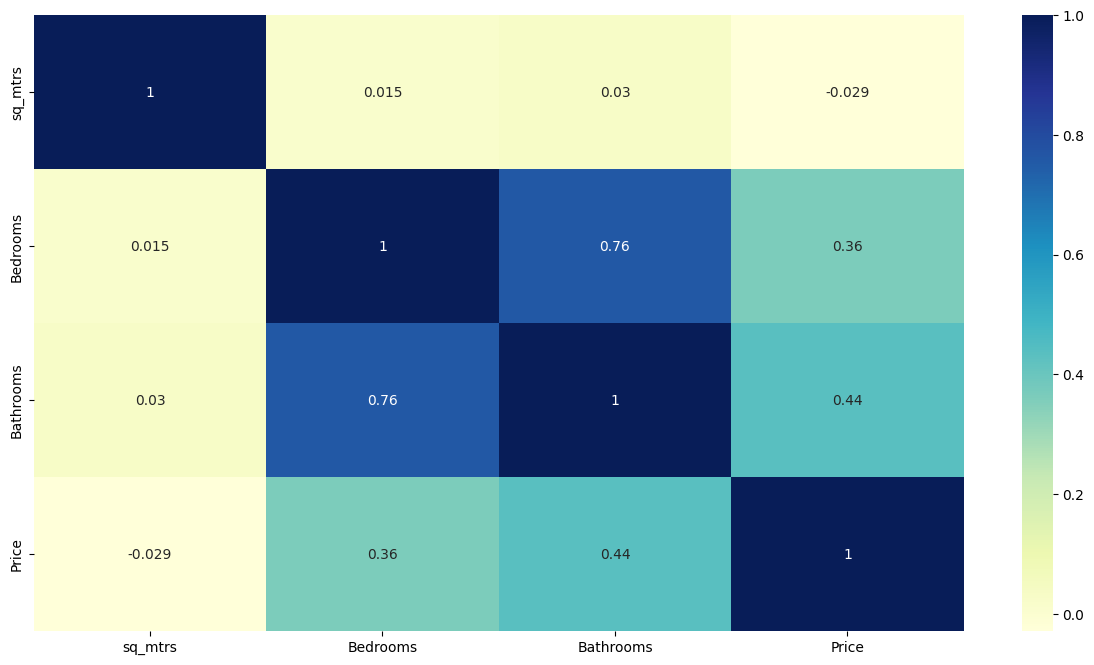

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(),annot=True,cmap='YlGnBu')

In [ ]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(x_train, y_train)
print (model, "\n")

ValueError: could not convert string to float: 'Absolute Estate Agents'